## Exercise 1

In [108]:
import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt
from numba import njit
from scipy import stats 

5000


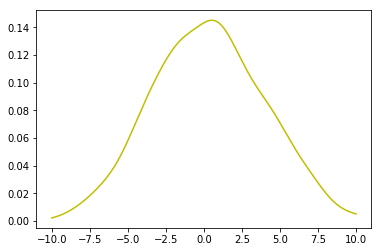

In [156]:
# Define function which yields silverman's constant
@njit
def silverman(sigma, n):
    '''
    A function which takes as input sigma = standard deviation of
    data and n = count of data, and outputs silverman's constant
    '''
    s = ( (4 * sigma ** 5) / (3 * n) ) ** .2
    return s


# Define function which evaluates gaussian kernel
@njit
def gauss(mu, sigmasq, x):
    '''
    A function which takes as input a point x and parameters mu and 
    sigmasq and outputs the density of the gaussian kernel with mean 
    mu and variance sigmasq at that point.
    Important note, sigmasq is variance not std deviation.
    '''
    g = ( 1 / (2 * np.pi * sigmasq) ) * np.exp( -( (x - mu) ** 2 / (2 * sigmasq) )  )
    return g

# Define function which evaluates the sum from the notebook 
@njit
def sumgauss(x, X, mean, var, h):
    '''
    This function evaluates the sum that is defined in the 
    jupyter notebook for a point x with respect to a set of 
    data X (x is not necessarily in X), with a given parameter
    h. Output is exactly that sum.
    
    I must include mean and var as arguments rather than calcuate
    them withi the function because I'm going to @njit this func.
    '''
    s = 0
    for i in range(len(X)):
        s += gauss(mean, var, (x - X[i] / h) ) 
    return s

# Define Kernel Density Estimator class
class KDE:
    '''
    A class that estimates the density function of a given dataset
    using the gaussian kernel as a guide. Has a data attribute and a 
    bandwidth attribute.
    Attributes:
    data (1xn array) = data points drawn from some unknown 
    distribution 
    bandwidth (float) = parameter 
    '''
    def __init__(self, data, bandwidth='silverman'):
        self.data = data
        self.mean = self.data.mean()
        self.var = self.data.var()
        self.n = len(self.data)
        # Default to silverman's constant
        if bandwidth == 'silverman':
            self.bandwidth = silverman(self.var, self.n)
        else:
            self.bandwidth = bandwidth
    
    #Method for kernel estimation
    def f(self, x):
        cumul = 0
        #Evaluate sumgauss at x and multiply by factor.
        out = (1 / (self.bandwidth * self.n) ) * sumgauss(x, self.data, self.mean, self.var, self.bandwidth)
        return out

#Define xgrid and function to estimate kernel.
xgrid = np.linspace(-10, 10, 5000)
outgrid = np.zeros(5000)
print(len(xgrid))

def kergrid(xgrid, KDE):
    '''
    Function designed generate an xgrid and apply the kernel 
    estimator to its points. Parameters are the xgrid and a KDE object
    (which is a sample that we're trying to estimate the density of). 
    Output is a grid that is the KDE function applied to the xgrid
    '''
    for i in range(len(xgrid)):
        outgrid[i] = KDE.f(xgrid[i])
    return outgrid

# Now begin testing it on some test data.
n = 1000 #number of elements in beta sample

# Beta Distribution: Alpha = 2, Beta = 2
X = rand.randn(1000)
kX = KDE(X)
#plt.hist(X, bins = 20)
est = kergrid(xgrid, kX)
plt.plot(xgrid, est, color = 'y')

# Beta Distribution: Alpha = 1, Beta = 5
#X = rand.beta(1, 5, n)

# Beta Distribution: Alpha = .5, Beta = .5
#X = rand.beta(.5, .5, n)


        

## Exercise 2
This is not bad:\begin{proof
If I can show that $||A|| < 1$, then I am done. By Gelfand's formula, $||A^k||^{\frac{1}{k}} \to r(A)<1$. And submultiplicativity gives us that for all $k \in \mathbb{N} $ $||A|| = ||(A^k)^{\frac{1}{k}}|| \leq ||A^k||^{\frac{1}{k}}$ which is less than 1 for sufficiently large k.